In [192]:
from TwitterSearch import *
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from scipy import stats

ts = TwitterSearch(
    consumer_key='KjQ7YEW4GrxWXj13zdQo3E84u',
    consumer_secret='qrNzrspVlUZ2M7SxODJ7xMbP46UdetvQif1RMGz08JqjoZlpyS',
    access_token='871803679707463680-1rmDvRiof5vcWnXKfI8zEaIPWrL81wl',
    access_token_secret='LIJCi90Sh9fsBdTt6af0Vm4qNvE0xcHLsujhwLCfRy283')

In [124]:
userTweets = TwitterUserOrder('racferguson') #Creates object userTweets of user

#for tweet in ts.search_tweets_iterable(userTweets):
    #print((tweet['user']['description'], tweet['user']['name'], tweet['text']))
    # Can change all of these things, can output lots of data

In [237]:
search = TwitterSearchOrder()
search.set_keywords(['woo', 'too'])
search.set_include_entities(False)

user = []
description = []
followers = []
statusCount = []
for tweet in ts.search_tweets_iterable(search):
    user.append(tweet['user']['screen_name']) # Creates list of screen names
    description.append(tweet['user']['description']) # Creates list of descriptions
    followers.append(tweet['user']['followers_count']) #Creates list of follower counts
    statusCount.append(tweet['user']['statuses_count']) #Counts number of statuses

assert len(user) == len(description)==len(followers)==len(statusCount), "lists are not equal length"

follow=np.array(followers)

In [139]:
emptyDes = np.zeros(len(description), dtype=int)
for i in range(len(description)):
    if description[i] == '':
        emptyDes[i] += 1
# If the description is empty for index i, add 1 to index i of the emptyDes array

In [140]:
emojis = np.zeros(len(description), dtype=int)
lowerBound = 0x10600
upperBound = 0xff650
for i in range(len(description)):
    for char in description[i]:
        if ord(char)>lowerBound and ord(char)<upperBound:
            emojis[i] += 1
# If there is an emoji with code between the upper and lower bounds in the description of i,
# Add one to the emojis array for each emoji counted

In [141]:
desLength = np.zeros(len(description), dtype = int)
for i in range (len(description)):
    for c in description[i]:
        desLength[i] += 1
# Counts the number of characters in the description for i, puts it in desLength

In [142]:
print('Number of data points: ', len(user))

Number of data points:  3789


In [231]:
newDesL = desLength/max(desLength)
# Percent length of status compared to data set

newFollowers = followers/max(follow)
# Scale of number of followers in the data set

newEmojis1 = np.zeros(len(emojis))

for i in range(len(emojis)):
    if desLength[i] != 0:
        newEmojis1[i] = np.divide(emojis[i],max(desLength))
    else:
        newEmojis1[i] == 0
# newEmojis1 is Prob of charater in des being an emoji

newEmojis = np.nan_to_num(newEmojis1) 

for i in range(len(newEmojis)):
    if newEmojis[i]>.2:
        print(newEmojis1[i], i)

data = np.matrix((user, newFollowers, newEmojis))
print(data.shape)

0.319526627219 745
0.284023668639 1054
0.372781065089 1828
0.236686390533 2920
(3, 3789)


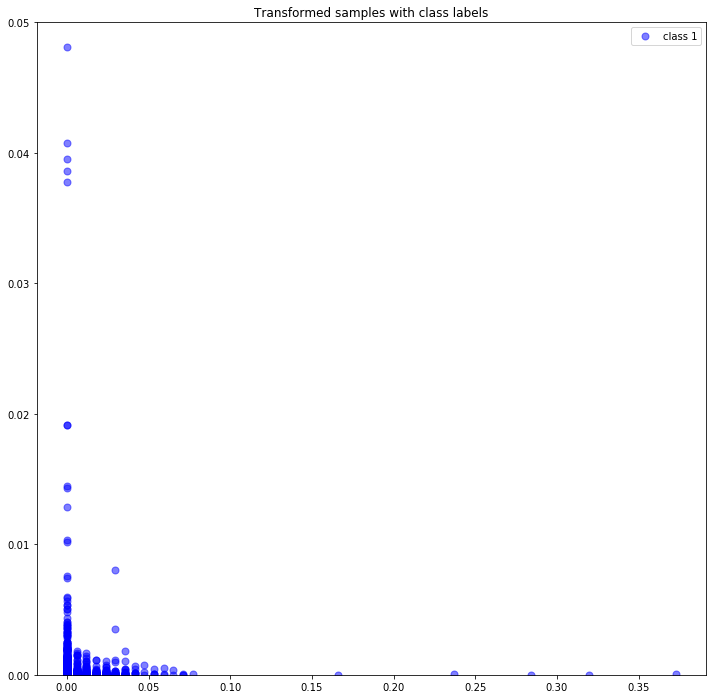

In [235]:
plt.figure(figsize=(12,12))
plt.plot(newEmojis, newFollowers, 'o', markersize=7, color='blue', alpha=.5, label='class 1')
    # Alpha changes color saturation
plt.legend()
plt.title('Transformed samples with class labels')
plt.ylim([0,.05])

plt.show()

In [236]:
outF = []
for i in range(len(newFollowers)):
    if newFollowers[i]> np.mean(newFollowers) + 2*np.std(newFollowers):
        outF.append([i])
    else:
        if newFollowers[i]< np.mean(newFollowers) - 2*np.std(newFollowers):
            outF.apend([i])
print(outF)

[[139], [243], [354], [435], [906], [1651], [1861], [2337], [2566], [2608], [3462]]


In [194]:
plt.figure(figsize=(12,12))
plt.plot(newNewE, newNewF, 'o', markersize=7, color='blue', alpha=.5, label='class 1')
    # Alpha changes color saturation
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

NameError: name 'newNewE' is not defined

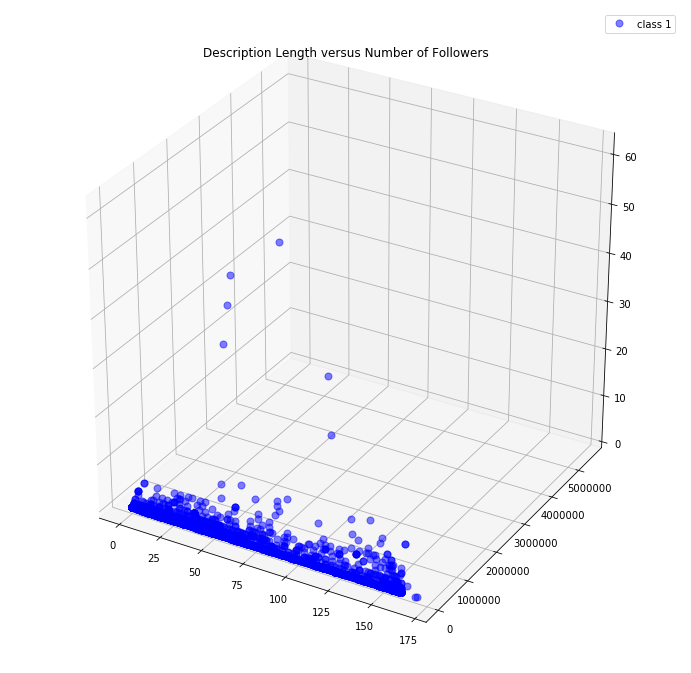

In [144]:
samplePlot = plt.figure(figsize=(12,12)) # Changes how large the plot is to see things
ax = samplePlot.add_subplot(111, projection='3d')

ax.plot(desLength, followers, emojis, 'o', markersize=7, color='blue', alpha=.5, label='class 1')
    # Alpha changes color saturation
ax.legend()
plt.title('Description Length versus Number of Followers')

plt.show()

In [180]:
samples = np.vstack((newFollowers, newEmojis))
followersMean = np.mean(samples[0,:])
emojisMean = np.mean(samples[1,:])
    # Uses a function to compute and store the mean of that dim by taking
    # only sample points of that direction
    
meanVector = np.array([[followersMean],[emojisMean],])
print(meanVector)

[[ 0.00073733]
 [ 0.00266733]]


In [181]:
covMatrix = np.cov(samples)
    # Handy function, computes the covariance of all the different dims
print(covMatrix)

[[  3.00770963e-04  -1.49395315e-06]
 [ -1.49395315e-06   1.53953357e-04]]


In [183]:
eigVal, eigVec = np.linalg.eig(covMatrix)

for i in range(len(eigVal)):
    eigVecShow = eigVec[:,i].reshape(1,2).T
    # New array consist of eigVec Matrix for only certain dim
    
    print(eigVecShow)
    print(eigVal[i], '\n')
    # Prints the eigenvector and eigen value for each of the dims

[[ 0.99994824]
 [-0.01017399]]
0.000300786163113 

[[ 0.01017399]
 [ 0.99994824]]
0.000153938156689 



In [184]:
eigPairs = [(np.abs(eigVal[i]), eigVec[:,i]) for i in range(len(eigVal))]
    # Takes the absolute value of the eigValue and pairs it to its eigVec
    # Puts these pairs in a tuple? Means you can't change it
eigPairs.sort(key=lambda x: x[0], reverse = True)
    # Can probably find better way to sort this, like descending function

for i in eigPairs:
    print(i[0])

0.000300786163113
0.000153938156689


In [187]:
matrixW = np.hstack((eigPairs[0][1].reshape(2,1), eigPairs[1][1].reshape(2,1)))
    # Matrix of the value corresponding to the key of the eigenvalue we choose
    # Here, we picked k=2
print(matrixW)
newSample = matrixW.T.dot(samples)

[[ 0.99994824  0.01017399]
 [-0.01017399  0.99994824]]


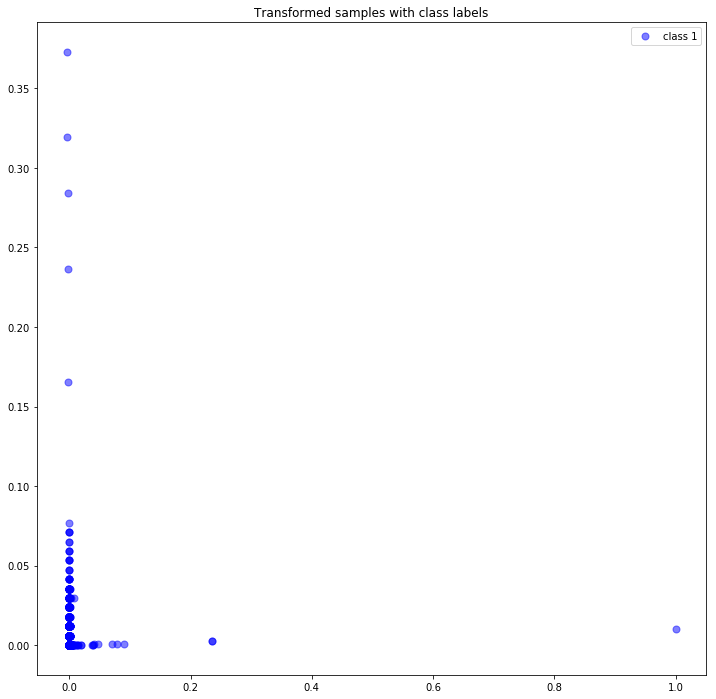

In [190]:
plt.figure(figsize=(12,12))
plt.plot(newSample[0,:], newSample[1,:], 'o', markersize=7, color='blue', alpha=.5, label='class 1')
    # Alpha changes color saturation
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()